# Señales en tiempo discreto

En este Notebook vamos a implementar algunas señales y operaciones básicas  vistas en la teoría. 

In [1]:
#librerias necesarias para la práctica
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
import IPython
plt.rcParams["figure.figsize"] = (14,4) #dimensiones por defecto al plotear (width, height)

## Visualización 

Un gráfico típico que nos encontraremos en la teoría y en los libros es el de "piruleta" o stem (barras con un círculo encima). Este tipo de gráficos se pueden realizar facilmente con matplotlib.  Voy a dejar una función ya configurada que podeis modificar a vuestro gusto.

In [2]:
#Este es un método de visualización muy básico para hacer pruebas
def plot_stem( t , y, y_lim=None, view_baseline=False, title=None):
    """Función que configura y visualiza un gráfico stem 

       Parámetros:
       t -- muestras de tiempo
       y -- secuencia para visualizar
       y_lim -- tupla de la forma (min, max) que establece los límites en el eje de ordenadas. Por defecto None
       view_baseline -- Establece una línea horizontal en el eje de las x a la altura de  y=0 . Por defecto False

    """
    markerline, stemlines, baseline = plt.stem(t, y)
    plt.setp(baseline, visible=view_baseline)
    plt.setp(markerline, color="crimson",markersize = 10)
    plt.setp(stemlines, color="crimson", linewidth = 4)
    plt.axvline(x=0, linewidth=1,color="black")
    plt.ylim(y_lim)
    if title is not None:
        plt.title(title)
    plt.show()
    
    


# Señales básicas
Vamos ahora a implementar algunas de las señales básicas que vimos en la teoría
## Impulso unitario
Todas las muestras son 0 excepto la n=0 que es 1. Representa un fenómeno físico de una duración muy corta


![Impulso unitario](./impulso.png)

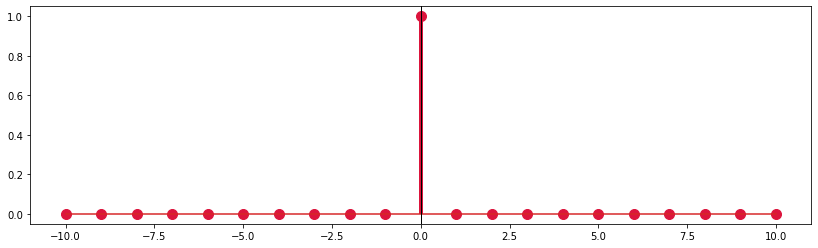

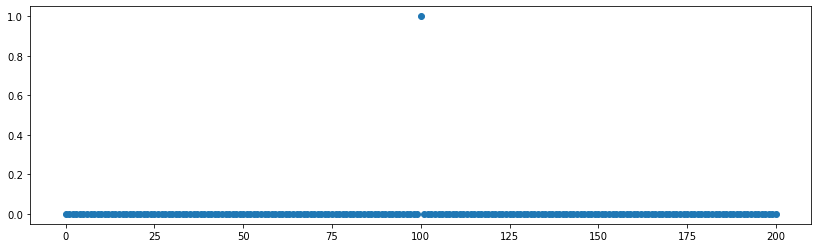

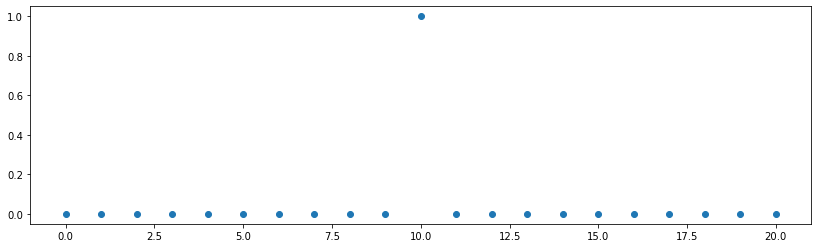

In [3]:
#definición del impulso unitario
def impulso_unitario(x, n=0):
    return 1 * (x == n)

muestras = np.arange(-10,10+1,1)
delta_signal = impulso_unitario(muestras)
plot_stem(muestras, delta_signal, view_baseline=True)

def pulso(n=0, linf=-100, lsup=100):
    return [(1 if i==n else 0) for i in range(linf, lsup+1)]

signal1 = pulso(0, -100, 100)
plt.plot(signal1, 'o')
plt.show()

signal2 = pulso(0, -10, 10)
plt.plot(signal2, 'o')
plt.show()

Una propiedad interesante es que cualquier secuencia arbitraria puede expresarse como una suma de impulsos desplazados y escalados


$x[n]=\sum \limits _{k=-\infty} ^{\infty}x[k] \delta[n-k] $

<span style='background:yellow' ><b>Ejercicios</b></span>
Genera y visualiza las siguientes secuencias impulso uitarios en los intervalos temporales especificados

* a) $\delta_{1}=2\delta[n],~~~~~ -20<=n<=20$
* b) $\delta_{2}=3.5\delta[n-115],~~~~~  100<=n<=150$
* c) $\delta_{3}=-0.5\delta[n],~~~~~ 1<=n<=20$
* d) $\delta_{4}=\delta[n+110],~~~~~ -120<=n<=100$

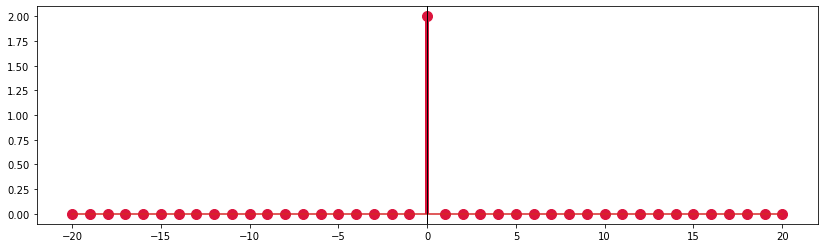

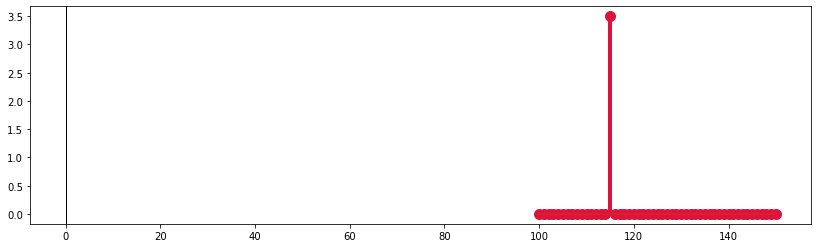

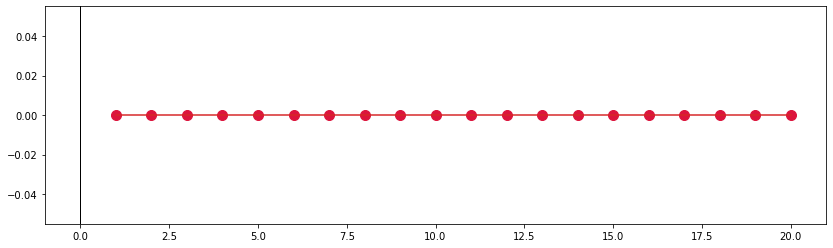

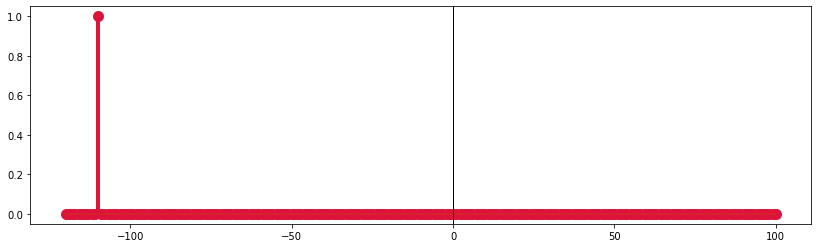

In [4]:
#Implementación de las soluciones a los ejercicios
#a)
muestras = np.arange(-20,20+1,1)
delta_signal = 2*impulso_unitario(muestras)
plot_stem(muestras, delta_signal, view_baseline=True)

#b)
muestras = np.arange(100,150+1,1)
delta_signal = 3.5*impulso_unitario(muestras, 115)
plot_stem(muestras, delta_signal, view_baseline=True)

#c)
muestras = np.arange(1,20+1,1)
delta_signal = -0.5*impulso_unitario(muestras)
plot_stem(muestras, delta_signal, view_baseline=True)

#d)
muestras = np.arange(-120,100+1,1)
delta_signal = impulso_unitario(muestras, -110)
plot_stem(muestras, delta_signal, view_baseline=True)

## Escalon Unidad
Es similar a la acción de un interruptor. 1 para valores >= 0 y 0 para el resto

![Impulso unitario](./escalon.png)


Relaciones interesantes entre el escalón unidad y el impulso

$u[n]=\sum \limits _{k=-\infty} ^{n}\delta[k]=\sum \limits _{k=0} ^{\infty} \delta[n-k]$


$\delta[n]=u[n]-u[n-1]$

<span style='background:yellow' ><b>Ejercicio</b></span> Implementa una función para crear el escalón unidad. Genera y visualiza una secuencia de prueba


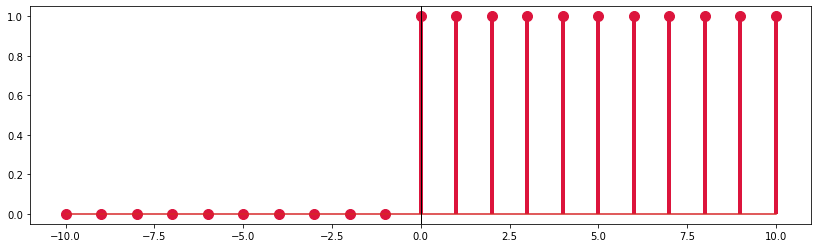

In [5]:
#Crear y visualizar la señal escalon unidad

def escalon_unidad(x, n=0):
    #escribir el código necesario
    return 1*(x>=n)

muestras = np.arange(-10,10+1,1)
delta_signal = escalon_unidad(muestras)
plot_stem(muestras, delta_signal, view_baseline=True)

<span style='background:yellow' ><b>Ejercicios</b></span>. Genera y visualiza las siguientes secuencias
* $u_{1}[n]=2u[n],~~~~~ -10<=n<=30$
* $u_{2}[n]=u[n-10],~~~~~ 0<=n<=50$
* $u_{3}[n]=-0.5u[n+100],~~~~~ -120<=n<=20$



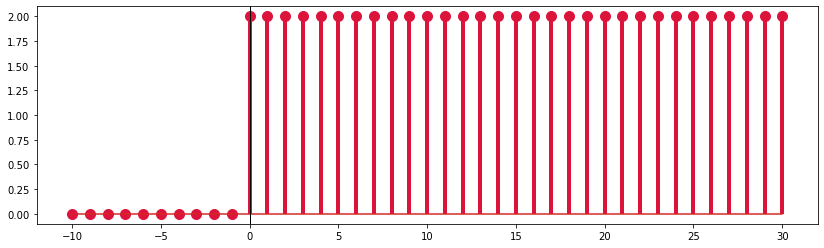

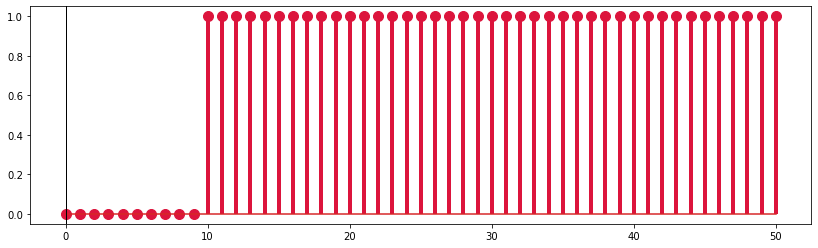

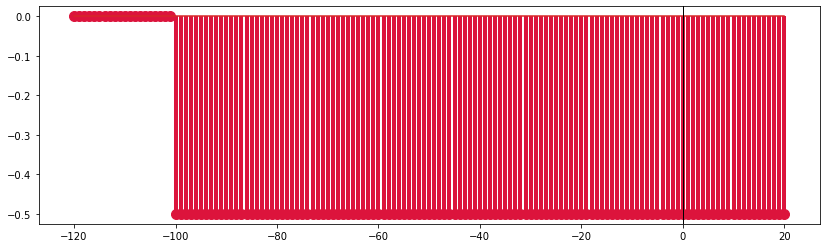

In [6]:
#implementación de los ejercicios
#a)
muestras_u1 = np.arange(-10,30+1,1)
u1 = 2*escalon_unidad(muestras_u1)
plot_stem(muestras_u1, u1, view_baseline=True)

#b)
muestras_u2 = np.arange(0,50+1,1)
u2 = escalon_unidad(muestras_u2, 10)
plot_stem(muestras_u2, u2, view_baseline=True)

#c)
muestras_u3 = np.arange(-120,20+1,1)
u3 = -0.5*escalon_unidad(muestras_u3, -100)
plot_stem(muestras_u3, u3, view_baseline=True)

## Secuencia Rampa 

![Rampa unidad](./rampa.png)

<span style="background:yellow"><b>Ejercicio</b></span> Implementa una función para crear una señal rampa . Genera y visualiza una secuencia de prueba entre -10 y 10

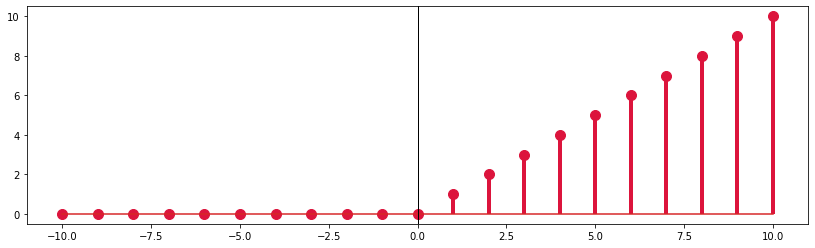

In [7]:
#Crear y visualizar la señal rampa

def rampa(x, n=0):
     return x*(x>=n)

muestras = np.arange(-10,10+1,1)
delta_signal = rampa(muestras)
plot_stem(muestras, delta_signal, view_baseline=True)

## Señal exponencial
La señal esponencial tiene la forma general:
## $x[n]=A\alpha^{n}$
Si $A$ y $\alpha$ son números reales, la secuencia es real

![Señal exponencial](./exponencial.png)

<span style="background:yellow"><b>Ejercicio</b></span>: Implementa una función para generar una secuencia exponencial real. Crea y visualiza una secuencia de prueba


* La función tendrá <b>un parámetro que permita emplear el escalón de unidad</b> para el control de la señal de la salida (como vimos en teoría). Si este parámetro está a True entonces solo dará los valores de la exponencial con n>=0 y todos los demás serán 0

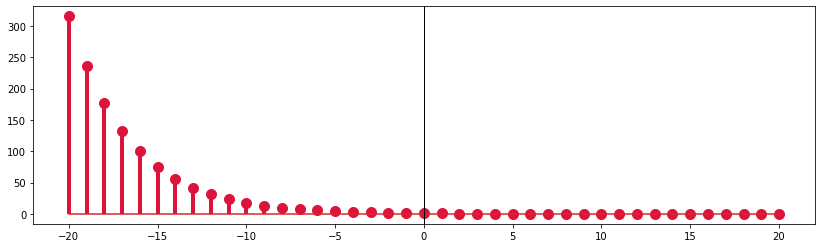

In [8]:
#Crear y visualizar la señal exponencial
def exponential_signal(x, alpha, amplitud=1, impulso=True):
    return (amplitud*pow(alpha, x))*(x>=0) if (impulso) else amplitud*pow(alpha, x)

muestras = np.arange(-20,20+1,1)
delta_signal = exponential_signal(muestras, 0.75, 1, False)
plot_stem(muestras, delta_signal, view_baseline=True)

<span style="background:yellow"><b>Ejercicios</b></span>:
Genera y visualiza en el intervalo  $-20<=n<30$ las siguientes secuencias:
* a) Una exponencial real creciente
* b) Una exponencial real creciente cuyos valores van alternando el signo
* c) Una exponencial real decreciente
* d) Una exponencial real decreciente cuyos valores van alternando el signo
* e) Obten la suma de los valores de la exponencial del apartado c)

<b>Emplea el escalón unidad</b> para la gestión de los valores de salida en los diferentes apartados 


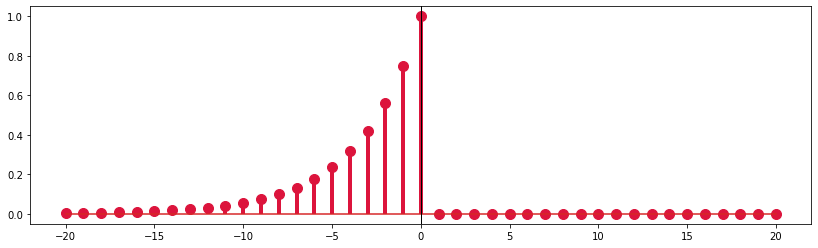

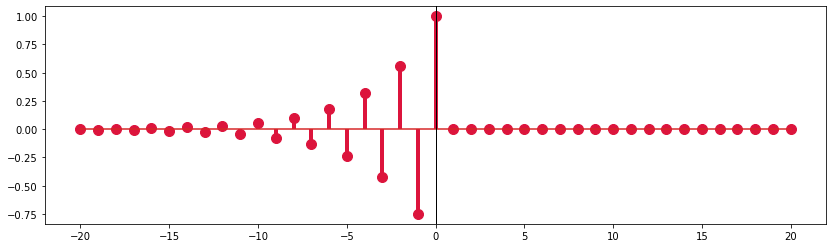

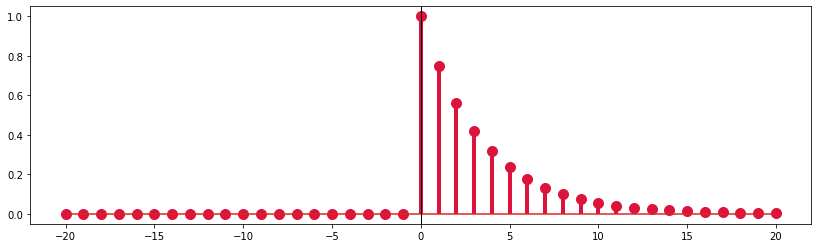

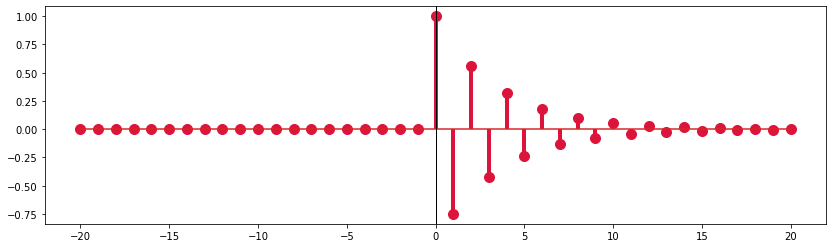

Suma de los valores del apartado c): 3.990486364183198


In [9]:
#Implementación ejercicios exponencial real
#a)
muestras = np.arange(-20,20+1,1)
delta_signal = exponential_signal(-muestras, 0.75)
plot_stem(muestras, delta_signal, view_baseline=True)

#b)
muestras = np.arange(-20,20+1,1)
delta_signal = exponential_signal(-muestras, -0.75)
plot_stem(muestras, delta_signal, view_baseline=True)

#c)
muestras = np.arange(-20,20+1,1)
delta_signal = exponential_signal(muestras, 0.75)
plot_stem(muestras, delta_signal, view_baseline=True)

#d)
muestras = np.arange(-20,20+1,1)
delta_signal = exponential_signal(muestras, -0.75)
plot_stem(muestras, delta_signal, view_baseline=True)

#e)
muestras = np.arange(-20,20+1,1)
delta_signal = exponential_signal(muestras, 0.75)
print("Suma de los valores del apartado c):", sum(delta_signal))


En los ejercicios  anteriores hemos trabajado con una secuencia real pero, tal y como hemos visto en la teoría, la secuencia exponencial también puede ser compleja. La secuencia exponencial compleja, con $A$ y $\alpha"$ números complejos, tiene la forma:

## $x[n]=A\alpha^{n}=|A|e^{j\phi} |\alpha|^n e^{j \omega_0n } =|A||\alpha|^n e^{\omega_0n+\phi}$


Al ser una señal compleja podemos representar la parte real y la imaginaria por separado



<span style="background:yellow"><b>Ejercicios</b></span>:


- Desarrolla una función que genere secuencias exponenciales complejas (parte real e imaginaria) recibiendo los siguientes argumentos($A,\alpha, \omega$ y $\phi$). esta función procesará los datos de entrada y devolverá una tupla con los valores reales e imaginarios de la secuencia. Para probarla podéis crear y visualizar la exponencial compleja con los siguientes argumentos:
    - $|A|=2$
    - $|\alpha|=0.9$
    - $\omega_0=\pi/10$ 
    
    - $\phi=\pi/16$
        
  


<b>Nota:</b> el siguiente ejercicio trata con sinusoidales, parte del código es compartido

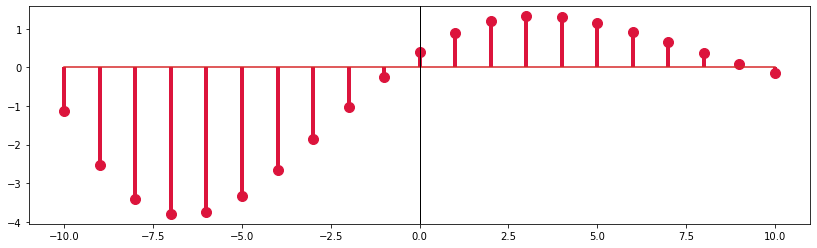

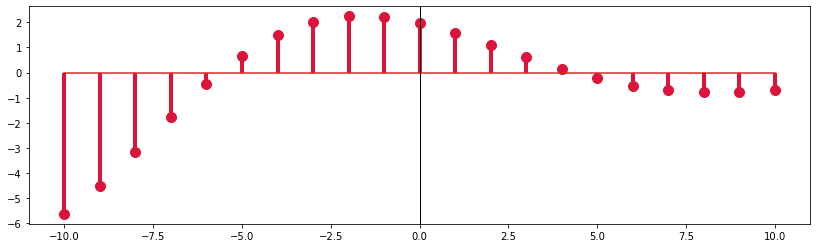

In [10]:
#Desarrollar la función para tratar con exponenciales complejas
#mi recomendación es crear una función sinusoidal que se aproveche para el siguiente ejercicio
def exp_complex_signal(x, amplitud, alpha, w, desfase=0):
    lista_sin = []
    lista_cos = []
    for i in range(0, len(x)):
        lista_sin.append(amplitud*pow(alpha, x[i])*np.sin(w*x[i]+desfase))
        lista_cos.append(amplitud*pow(alpha, x[i])*np.cos(w*x[i]+desfase))
    return lista_sin, lista_cos

muestras = np.arange(-10,10+1,1)
delta_signal1, delta_signal2 = exp_complex_signal(muestras, 2, 0.9, np.pi/10, np.pi/16)
plot_stem(muestras, delta_signal1, view_baseline=True)
plot_stem(muestras, delta_signal2, view_baseline=True)

## Señal sinusoidal

## $x[n]=Acos(\omega_{0}n+ \phi)$

$\omega_{0}:$ frecuencia en radianes por muestra. Lo podemos expresar también en Hz: $\omega_{0}=2\pi f_{0}$
![Señal sinusoidal](./sinusoidal.png)
 


<span style="background:yellow"><b>Ejercicio:</b></span> Crea, a través de una función, y visualiza una señal sinusoidal

- La función permitirá recibir radianes o hercios y tendrán preferencia los radianes si se cubren los 2 parámetros
- cos es una función de numpy
- pi es una constante de numpy
- Para visualizarla podéis emplear la función que os proporciono que la mostrará como una secuencia en discreta. En el caso de que quisierais simular un continuo en una señal sinusoidal podéis hacer los siguiente:
     - crear las muestras con np.linspace para simular un continuo
     - Visualizar con plt.plot
- Para probarlo podéis emplear: 
     - $A=1$
     - $\omega_0=\pi/16$ o $f_0=1/32$
     - $\phi=\pi$



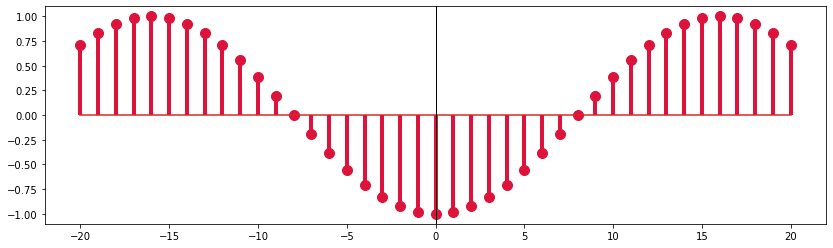

In [11]:
#Crear y visualizar la señal exponencial
def sinusoidal_signal(x, amplitud, w_rad=0, w_herz=0, desfase=0):
    if(w_rad != 0 and w_herz == 0):
        return amplitud*np.cos(w_rad*x + desfase)
    elif(w_rad == 0 and w_herz != 0):
        return amplitud*np.cos(2*np.pi*w_herz*x + desfase)
    else:
        return amplitud*np.cos(w_rad*x + desfase)

muestras = np.arange(-20,20+1,1)
signal = sinusoidal_signal(muestras, 1, np.pi/16, 1/32, np.pi)
plot_stem(muestras, signal, view_baseline=True)

<span style="background:yellow"><b>Ejercicios</b></span>
Crea y visualiza las siguientes secuencias en los intervalos correspondientes
* $s_{1}[n]=cos(\pi n/15), ~~~~~-20 <= n <=40$
* $s_{2}[n]=2cos(\pi n/15 + \pi /3 ), ~~~~~-20 <= n <=5$
* $s_{3}[n]=cos(n/2), ~~~~~ 0<=n<=40$


* Analiza si las secuencias anteriores son periódicas. Puedes emplear el título de la image (parámetro title de plot_stem) para etiquetarlas como periódicas o aperiódicas e imprimir su frecuencia  $f_0$

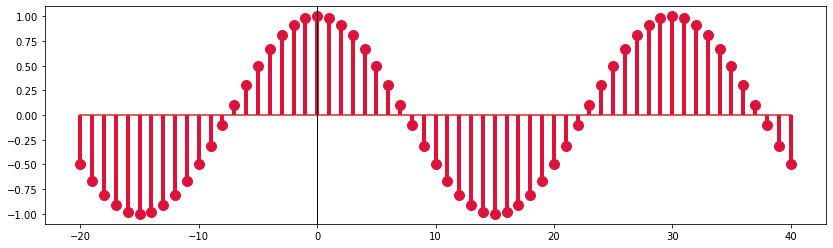

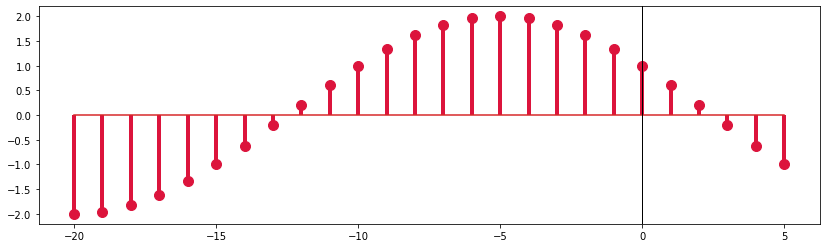

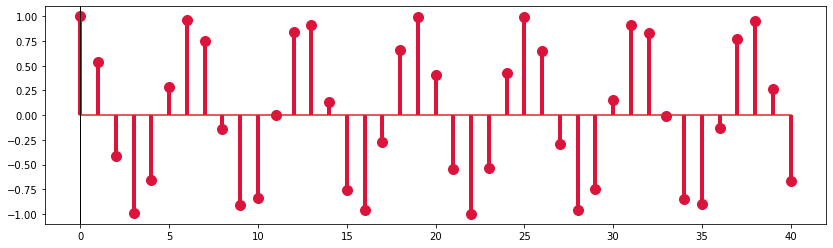

In [12]:
#Ejercicios sinusoidales
#a)
muestras_s1 = np.arange(-20,40+1,1)
s1 = sinusoidal_signal(muestras_s1, 1, np.pi/15)
plot_stem(muestras_s1, s1, view_baseline=True)

#b)
muestras_s2 = np.arange(-20,5+1,1)
s2 = sinusoidal_signal(muestras_s2, 2, np.pi/15, 0, np.pi/3)
plot_stem(muestras_s2, s2, view_baseline=True)

#c)
muestras_s3 = np.arange(0,40+1,1)
s3 = sinusoidal_signal(muestras_s3, 1, 1)
plot_stem(muestras_s3, s3, view_baseline=True)


# Operaciones elementales con secuencias

## Suma y Producto
La suma y el producto de 2 secuencias $x_{1}[n]$ y $x_{2}[n]$ se define como la suma y el producto muestra a muestra

Aparece un problema cuando las secuencias están definidas en diferentes intervalos de tiempo. Podemos aplicar una de las dos siguientes soluciones:
* Añadir ceros para cubrir las zonas que no definidas
* Aplicar la operación solo al intervalo común

<span style="background:yellow"><b>Ejercicio</b></span>
* Representar la secuencia generada tanto  por la suma como por el producto de las secuencias $u_{2}[n]$ y $s_{1}[n]$ de los ejercicios anteriores


<b>Nota</b>: Implementar las 2 soluciones comentadas anteriormente. Para poder implementar estas soluciones, las funciones que desarrolleis necesitarán conocer las secuencias y también sus límites

Recordatorio
* $s_{1}[n]=cos(\pi n/15), ~~~~~-20 <= n <=40$
* $u_{2}[n]=u[n-10],~~~~~ 0<=n<=50$




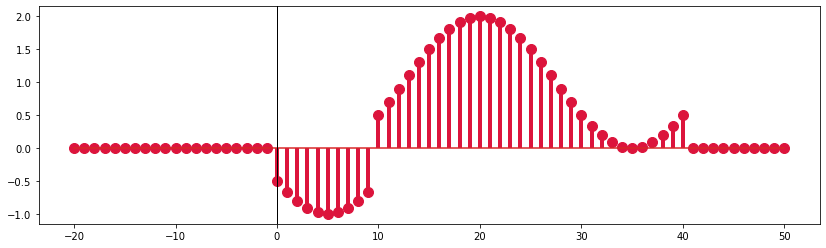

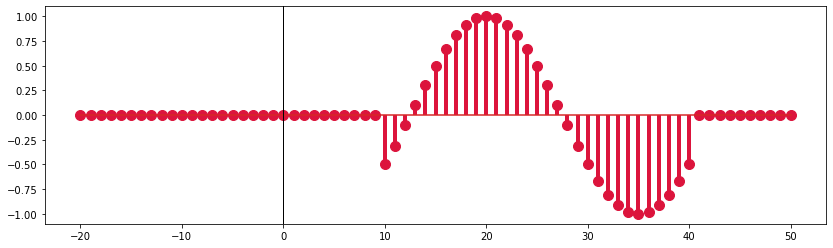

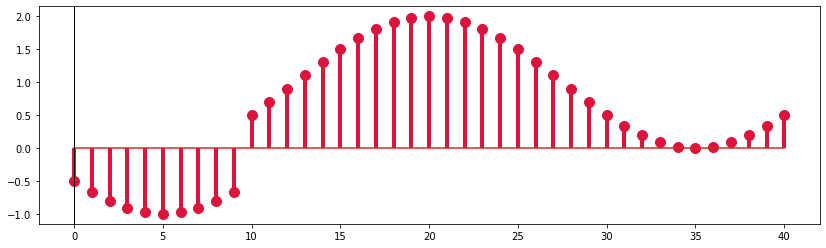

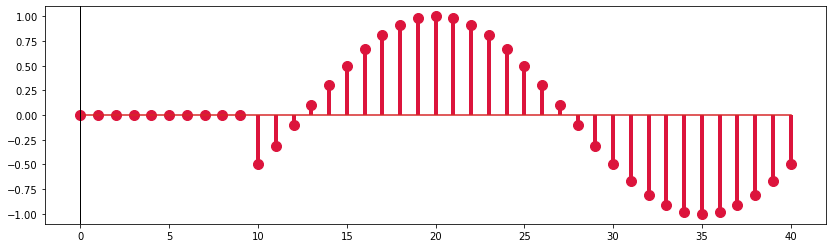

In [13]:
#Crea las funciones para poder sumar y multiplicar 
#1) solo en el intervalo común
#2) añadiendo ceros en las secuencias hasta "completarlas"
#Desarrolla la suma y el producto de u2 y s1 de los dos modos

def suma_interv_comun(x1, y1, x2, y2):
    add_signal = []
    diff_izq = abs(min(x1)-min(x2))
    diff_der = abs(max(x1)-max(x2))

    if(min(x1)!=min(x2)):
        for i in range(diff_izq):
            add_signal.insert(0, 0)

    for i in range(min(max(x1),max(x2)-max(min(x1),min(x2)))+1):
        add_signal.append(y1[i]+y2[i])

    if(max(x1)!=max(x2)):
        for i in range(diff_der):
            add_signal.append(0)

    add_interv = np.arange(min(min(x1),min(x2)), max(max(x1),max(x2))+1, 1)

    return add_signal, add_interv

def prod_interv_comun(x1, y1, x2, y2):
    add_signal = []
    diff_izq = abs(min(x1)-min(x2))
    diff_der = abs(max(x1)-max(x2))

    if(min(x1)!=min(x2)):
        for i in range(diff_izq):
            add_signal.insert(0, 0)

    for i in range(min(max(x1),max(x2)-max(min(x1),min(x2)))+1):
        add_signal.append(y1[i]*y2[i])

    if(max(x1)!=max(x2)):
        for i in range(diff_der):
            add_signal.append(0)

    add_interv = np.arange(min(min(x1),min(x2)), max(max(x1),max(x2))+1, 1)

    return add_signal, add_interv

def suma_ceros(x1, y1, x2, y2):
    add_signal = []

    for i in range(min(max(x1),max(x2)-max(min(x1),min(x2)))+1):
        add_signal.append(y1[i]+y2[i])

    add_interv = np.arange(max(min(x1),min(x2)), min(max(x1),max(x2))+1, 1)

    return add_signal, add_interv

def prod_ceros(x1, y1, x2, y2):
    add_signal = []

    for i in range(min(max(x1),max(x2)-max(min(x1),min(x2)))+1):
        add_signal.append(y1[i]*y2[i])

    add_interv = np.arange(max(min(x1),min(x2)), min(max(x1),max(x2))+1, 1)

    return add_signal, add_interv

#1) Suma:
sum1, interv_sum1 = suma_interv_comun(muestras_s1, s1, muestras_u2, u2)
plot_stem(interv_sum1, sum1, view_baseline=True)

#1) Producto:
prod1, interv_prod1 = prod_interv_comun(muestras_s1, s1, muestras_u2, u2)
plot_stem(interv_prod1, prod1, view_baseline=True)

#2) Suma:
sum2, interv_sum2 = suma_ceros(muestras_s1, s1, muestras_u2, u2)
plot_stem(interv_sum2, sum2, view_baseline=True)

#2) Producto:
prod2, interv_prod2 = prod_ceros(muestras_s1, s1, muestras_u2, u2)
plot_stem(interv_prod2, prod2, view_baseline=True)

## Escalado o cambio de amplitud
Dada $x[n]$ y la constante real A, obtenemos una nueva secuencia  $y[n]=Ax[n]$, donde cada muestra de $x[n]$ queda multiplicada por la constante A. Cuando  $|A| > 1$, la secuencia resultante es una versión amplificada de la  original, mientras que si $|A| < 1$, la señal es uan versión atenuada. Además si A<0 también se produce un cambio de polaridad.

<span style="background:yellow"><b>Ejercicios</b></span>
Utilizar la secuencia $u_{2}$ para representar los siguientes escalados
* A = 2
* A= 0.5
* A = -0.6

Recordatorio
* $u_{2}[n]=u[n-10],~~~~~ 0<=n<=50$


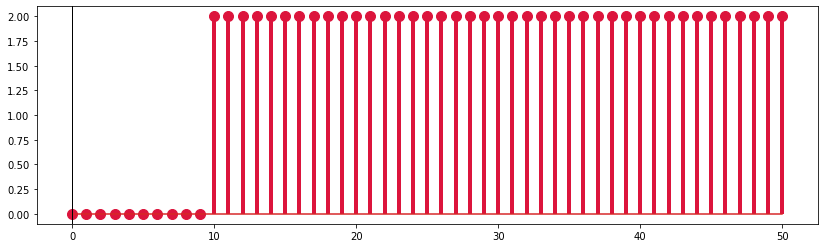

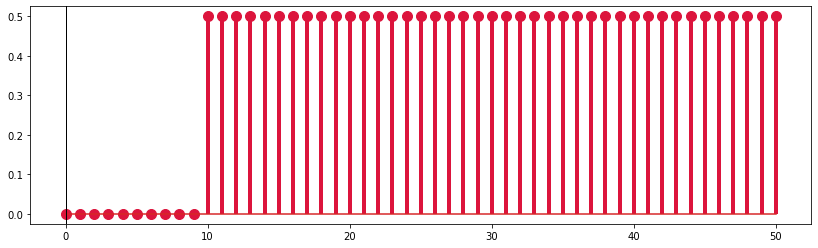

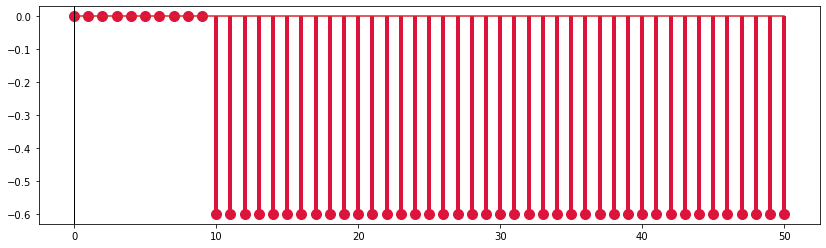

In [14]:
#Ejercicios de escalado de secuencias
def cambio_amplitud(signal, amplitud):
    return amplitud*signal

# A = 2:
signal_cambio_amplitud_A = cambio_amplitud(u2, 2)
plot_stem(muestras_u2, signal_cambio_amplitud_A, view_baseline=True)

# A = 0.5:
signal_cambio_amplitud_B = cambio_amplitud(u2, 0.5)
plot_stem(muestras_u2, signal_cambio_amplitud_B, view_baseline=True)

# A = -0.6:
signal_cambio_amplitud_C = cambio_amplitud(u2, -0.6)
plot_stem(muestras_u2, signal_cambio_amplitud_C, view_baseline=True)

## Desplazamiento
Dada $x[n]$ y la constante entera $k$, la secuencia desplazada $y[n]=x[n-k]$ será una traslación de $k$ unidades hacia la derecha  si k>0 o hacia la izquierda si k<0. El desplazamiento hacia el futuro no es posible en señales recogidas en tiempo real pero puede emplearse en datos almacenados. Con las secuencias truncadas un desplazamiento origina una pérdida de valores por un extremo. Existen 2 formas de gestionarlo:
* Tratar la señal original como una señal de soporte finito (meter ceros en los valores que no tenemos)
* Extender la señal original como si fuese periódica

<span style="background:yellow"><b>Ejercicios</b></span>
* Crear una función que permita desplazar una secuencia $k$ unidades de tiempo. La función tratará la secuencia original como una secuencia de soporte finito (desplazamiento lineal)

* Crear una función que permita desplazar una secuencia $k$ unidades de tiempo. La función tratará la secuencia original como una señal períodica (desplazamiento circular)

Para probar las funciones vamos a considerar la secuencia 

$x[n]=0.99^{n}, ~~~~~ 0<=n<=39$

* Realiza un desplazamiento lineal de 10 unidades (n-10)
* Realice un desplazamiento circular de 10 unidades hacia el futuro (n+10)
* Visualizar las secuencias resultantes


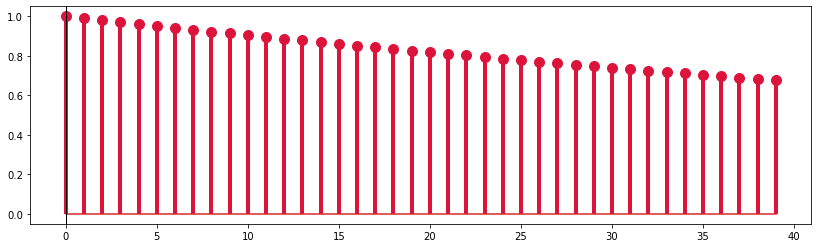

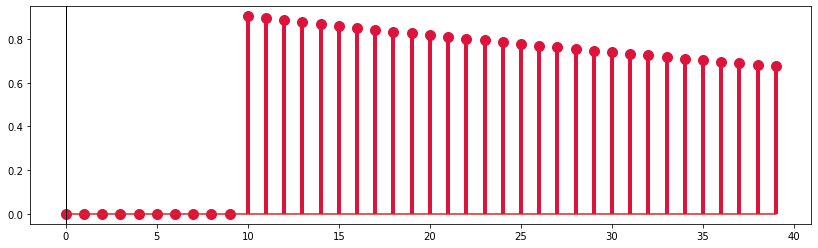

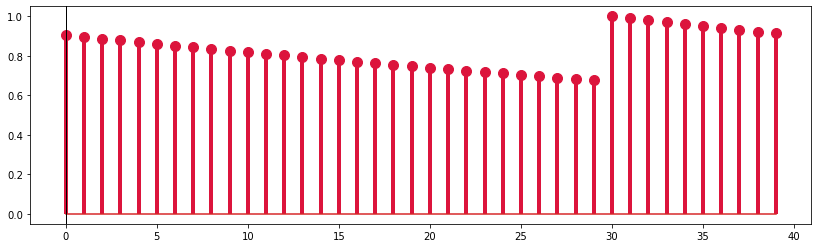

In [15]:
#Desarrolla una función que permita el desplazamiento con soporte finito
def desplazamiento_lineal(x, k):

    new_signal = []
    if(k>0):
        for i in range(abs(k)):
            new_signal.insert(0,0)

        for i in range(abs(k), len(x), 1):
            new_signal.append(x[i])

    if(k<0):
        for i in range(abs(k), len(x), 1):
            new_signal.append(x[i])

        for i in range(abs(k)):
            new_signal.append(0)

    return new_signal

#Desarrolla una función que permita el desplazamiento circular
def desplazamiento_circular(x, k):
    basic_signal = []
    for i in range(len(x)):
        basic_signal.append(x[i])

    new_signal = []
    if(k>0):
        new_signal = basic_signal[len(basic_signal)-abs(k):len(basic_signal)]+basic_signal[0:len(basic_signal)-abs(k)]
    else:
        new_signal = basic_signal[abs(k):len(basic_signal)]+basic_signal[0:abs(k)]

    return new_signal


muestras = np.arange(0, 39+1, 1)

signal_inicial = 0.99**muestras
plot_stem(muestras, signal_inicial, view_baseline=True)

signal_lineal = desplazamiento_lineal(signal_inicial, 10)
plot_stem(muestras, signal_lineal, view_baseline=True)

signal_circular = desplazamiento_circular(signal_inicial, -10)
plot_stem(muestras, signal_circular, view_baseline=True)

## Reflexión
Partiendo de x[n] la secuencia reflejada será x[-n]. Gráficamente, la reflexión consiste en un abatimiento de la señal  respecto al eje de ordenadas. 


<span style="background:yellow"><b>Ejercicio</b></span>: realizar la reflexión de la secuencia anterior: $x[n]=0.99^{n}u[n], ~~~~~ -10<=n<=39$

Visualizar ambas secuencias

<b>Nota:</b>: es necesario gestionar los índices en la visualización



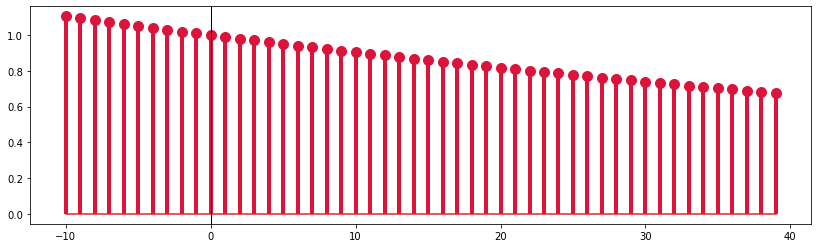

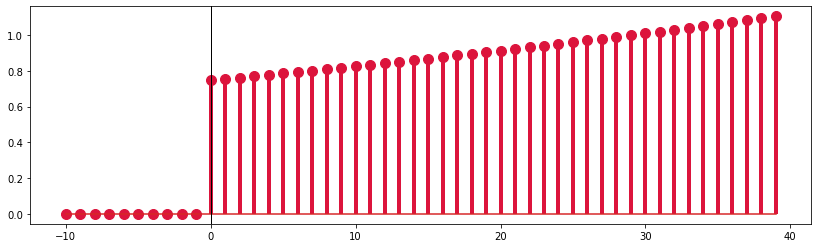

In [16]:
#Crea una función que permita reflejar una secuencia
#Es necesario que gestioneis los índices 
def reflejar_secuencia(secuencia, idx_secuencia):
    if(idx_secuencia == 0):
        return secuencia[::-1]
    else:
        return desplazamiento_lineal(secuencia[::-1], idx_secuencia)


muestras = np.arange(-10, 39+1, 1)

secuencia = 0.99**muestras
plot_stem(muestras, secuencia, view_baseline=True)

signal_reflejada = reflejar_secuencia(secuencia, 10)
plot_stem(muestras, signal_reflejada, view_baseline=True)

## Energía y  potencia de una señal

Hemos visto en la teoría que la energía de una señal se calcula como:


$E= \sum\limits_{n=-\infty}^{\infty} |x[n]|^2$ 


Llamamos <b>señal de energía</b> a una señal con energía finita

El cálculo de la energia para una secuencia finita se calcula aplicando directamente la fórmula sobre los valores de la señal


Las señales con energía infinita pueden tener potencia media finita

La potencia media se calcula como:
$P=\lim\limits_{N=-\infty} \frac{1}{2N+1}\sum\limits_{n=-\infty}^{\infty} |x[n]|^2$


* Si la energía es finita, entonces la potencia media es infinita
* Si la energía es infinita, entonces la potencia media puede ser finita o infinita


Llamamos <b>señal de potencia</b> a una señal con potencia media finita

La potencia media de una señal periódica $\tilde{x}[n]$es finita e igual a la potencia media sobre un período

$P_{\tilde{x}}=\frac{1}{N}\sum\limits_{n=0}^{N-1} |x[n]|^2$


<span style="background:yellow"><b>Ejercicio</b></span>: Calcula la energía para la siguiente secuencia finita

In [17]:
x=[randrange(-10,10) for i in range(1000)]

In [18]:
#Calcula la energía de la secuencia anterior
def energia(secuencia, w=0):
    sinusoidal = False
    if (w!=0):
        periodo = int((2*np.pi)/w)
        if(secuencia[0]==secuencia[periodo]):
            sinusoidal = True

    temp = []
    if(sinusoidal):
        signal = secuencia[0:periodo]
        for i in range(len(signal)):
            temp.append(abs(signal[i])**2)
        return sum(temp), periodo
    else:
        for i in range(len(secuencia)):
            temp.append(abs(secuencia[i])**2)
        return sum(temp)

print("Energía:",energia(x))

Energía: 34698


<span style="background:yellow"><b>Ejercicio</b></span>: 
Empleando la función desarrollada para crear una sinusoidal, emplead los siguientes valores para generar la secuencia correspondiente en el intervalo [-20,40] y calcular su potencia media

* |A|=4
* $w_0=\frac{\pi}{15}$
* $\phi=\frac{\pi}{3}$
* $-20<=n<=40$



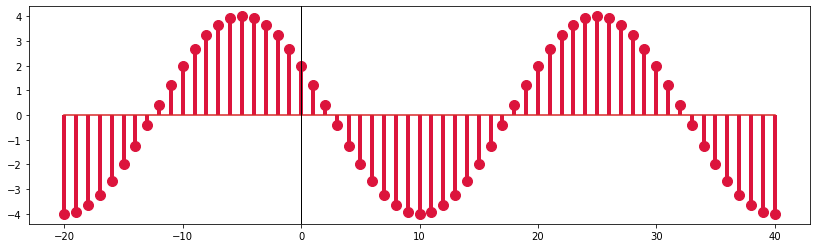

Energía: 240.00000000000003
Período: 30


In [19]:
#Crea la sinusoidal y calcula su potencia. Requiere comprobar que es periódica y,
#en caso de serlo, calcular su período
muestras = np.arange(-20,40+1,1)
signal = sinusoidal_signal(muestras, 4, np.pi/15, 0, np.pi/3)
plot_stem(muestras, signal, view_baseline=True)
energia, periodo = energia(signal, np.pi/15)
print("Energía:",energia)
print("Período:",periodo)